# FCN with CRFs modify by hj, cw

1) 버클리 대학교에서 제공하는 FCN 모델(Pytorch)와 가우시안 분포 속에서 확률적 접근을 위한 CRF의 기존 모델링을 수정<br>
2) 수정된 모델은 다음과 같은 Flow를 따름<br>
3) 사용하는 FCN 모델은 16 디코딩 모델

In [1]:
!cat model/fcn16s.py

'''
create by berkleyvision.
'''
import os.path as osp

import fcn
import torch.nn as nn

from .fcn32s import get_upsampling_weight


class FCN16s(nn.Module):

    pretrained_model = \
        osp.expanduser('~/data/models/pytorch/fcn16s_from_caffe.pth')

    @classmethod
    def download(cls):
        return fcn.data.cached_download(
            url='http://drive.google.com/uc?id=0B9P1L--7Wd2vVGE3TkRMbWlNRms',
            path=cls.pretrained_model,
            md5='991ea45d30d632a01e5ec48002cac617',
        )

    def __init__(self, n_class=21):
        super(FCN16s, self).__init__()
        # conv1
        self.conv1_1 = nn.Conv2d(3, 64, 3, padding=100)
        self.relu1_1 = nn.ReLU(inplace=True)
        self.conv1_2 = nn.Conv2d(64, 64, 3, padding=1)
        self.relu1_2 = nn.ReLU(inplace=True)
        self.pool1 = nn.MaxPool2d(2, stride=2, ceil_mode=True)  # 1/2

        # conv2
        self.conv2_1 = nn.Conv2d(64, 128, 3, padding=1)
        self.relu2_1 = nn.ReLU(inplace=True)
   

            
            ### Create LabelMap by CRF ###
            output = dense_crf(image_original, output)
            labelmap = np.argmax(output, axis=0)
            labels = np.unique(labelmap)
            
            ## Bring to a characters ##
            '''
            Like to the softmax.
            1) numpy floor :
            a = np.array([-1.7, -1.5, -0.2, 0.2, 1.5, 1.7, 2.0])
            array([-2., -2., -1.,  0.,  1.,  1.,  2.])
            
            2) numpy ceil :
            a = np.array([-1.7, -1.5, -0.2, 0.2, 1.5, 1.7, 2.0])
            array([-1., -1., -0.,  1.,  2.,  2.,  2.])
            '''
            rows = np.floor(np.sqrt(len(labels) + 1)) 
            cols = np.ceil((len(labels) + 1) / rows)

# Analysis of a mask dataset.

Airbus's does give to you data to converted a line only.<br>
So, you have to image to line, and sequence match with a mask image.<br>
We do to provide to example the below.

In [2]:
import csv
#For visualization
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from skimage.data import imread
import matplotlib.pyplot as plt

In [3]:
def gen():
    with open("./train_ship_segmentations_v2.csv", newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            yield row['ImageId'], row['EncodedPixels']      

In [4]:
a = gen()
print(next(a))
print(next(a))
print(next(a))
print(next(a))
print(next(a))

('00003e153.jpg', '')
('0001124c7.jpg', '')
('000155de5.jpg', '264661 17 265429 33 266197 33 266965 33 267733 33 268501 33 269269 33 270037 33 270805 33 271573 33 272341 33 273109 33 273877 33 274645 33 275413 33 276181 33 276949 33 277716 34 278484 34 279252 33 280020 33 280788 33 281556 33 282324 33 283092 33 283860 33 284628 33 285396 33 286164 33 286932 33 287700 33 288468 33 289236 33 290004 33 290772 33 291540 33 292308 33 293076 33 293844 33 294612 33 295380 33 296148 33 296916 33 297684 33 298452 33 299220 33 299988 33 300756 33 301524 33 302292 33 303060 33 303827 34 304595 34 305363 33 306131 33 306899 33 307667 33 308435 33 309203 33 309971 33 310739 33 311507 33 312275 33 313043 33 313811 33 314579 33 315347 33 316115 33 316883 33 317651 33 318419 33 319187 33 319955 33 320723 33 321491 33 322259 33 323027 33 323795 33 324563 33 325331 33 326099 33 326867 33 327635 33 328403 33 329171 33 329938 34 330706 34 331474 33 332242 33 333010 33 333778 33 334546 33 335314 33 336082 

In [5]:
train_set_overview = pd.read_csv("./train_ship_segmentations_v2.csv")
train_set_overview.head()

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...


# Image data set

**Shape = 768 by 768**<br>

08d2cef6f.jpg


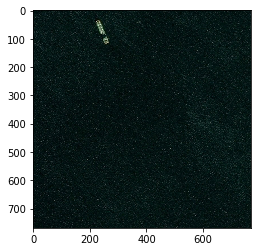

In [6]:
import os
import torch
import torchvision
from torchvision import transforms


train_data_path = './train_image/train/'
imgList = os.listdir(train_data_path)
img = plt.imread(os.path.join(train_data_path,imgList[0]))
plt.imshow(img)
print(imgList[0])

In [7]:
imagenet_data = torchvision.datasets.ImageFolder("./train_image/", transform=transforms.ToTensor())
data_loader = torch.utils.data.DataLoader(imagenet_data,
                                          batch_size=1,
                                          shuffle=True
                                         )
def load(dataloader):
    for data in dataloader:
        yield data

In [8]:
gen = load(data_loader)
data = next(gen)

## RGB to GrayScale
**Note that you have to transform grayscale to RGB.**

In [9]:
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
from skimage import data
from torchvision import transforms

data = next(gen)
print(data)

[tensor([[[[0.0549, 0.0627, 0.0706,  ..., 0.0549, 0.0549, 0.0588],
          [0.0549, 0.0588, 0.0588,  ..., 0.0353, 0.0431, 0.0471],
          [0.0549, 0.0510, 0.0510,  ..., 0.0275, 0.0392, 0.0471],
          ...,
          [0.0627, 0.0588, 0.0549,  ..., 0.0667, 0.0745, 0.0667],
          [0.0627, 0.0588, 0.0510,  ..., 0.0667, 0.0706, 0.0667],
          [0.0627, 0.0588, 0.0471,  ..., 0.0667, 0.0706, 0.0627]],

         [[0.3176, 0.3255, 0.3333,  ..., 0.2510, 0.2510, 0.2549],
          [0.3176, 0.3216, 0.3216,  ..., 0.2314, 0.2392, 0.2431],
          [0.3176, 0.3137, 0.3137,  ..., 0.2235, 0.2353, 0.2431],
          ...,
          [0.3294, 0.3255, 0.3216,  ..., 0.3608, 0.3686, 0.3608],
          [0.3294, 0.3255, 0.3176,  ..., 0.3608, 0.3647, 0.3608],
          [0.3294, 0.3255, 0.3137,  ..., 0.3608, 0.3647, 0.3569]],

         [[0.3529, 0.3608, 0.3686,  ..., 0.2784, 0.2784, 0.2824],
          [0.3529, 0.3569, 0.3569,  ..., 0.2588, 0.2667, 0.2706],
          [0.3529, 0.3490, 0.3490,  ..., 

In [10]:
inputs , labels = data
print(inputs.shape)

torch.Size([1, 3, 768, 768])


# Usage deeplab library

In [11]:
#import FCN model
from model.fcn16s import FCN16s
from model.deeplabV2 import DeepLabV2

In [12]:
N_CLASSES = 1
N_BLOCKS = [3, 4, 23, 3] #rate
PYRAMIDS = [6, 12, 18, 24]
inputs, labels = data
#print(inputs)
net = DeepLabV2(N_CLASSES, N_BLOCKS, PYRAMIDS)
net.cuda()
out = net(inputs.cuda())
print(out.shape)

[info] shape on DeepLab :  torch.Size([1, 3, 768, 768])
Conv Batch NormRELU :  torch.Size([1, 3, 768, 768])
ResBlock per Shape :  torch.Size([1, 3, 385, 385])
Buttleneck pass shape :  torch.Size([1, 3, 385, 385])
Conv Batch NormRELU :  torch.Size([1, 3, 385, 385])
Conv Batch NormRELU :  torch.Size([1, 3, 385, 385])
Conv Batch NormRELU :  torch.Size([1, 3, 385, 385])
Conv Batch NormRELU :  torch.Size([1, 3, 385, 385])
Buttleneck pass shape :  torch.Size([1, 12, 385, 385])
Conv Batch NormRELU :  torch.Size([1, 12, 385, 385])
Conv Batch NormRELU :  torch.Size([1, 3, 385, 385])
Conv Batch NormRELU :  torch.Size([1, 3, 385, 385])
Buttleneck pass shape :  torch.Size([1, 12, 385, 385])
Conv Batch NormRELU :  torch.Size([1, 12, 385, 385])
Conv Batch NormRELU :  torch.Size([1, 3, 385, 385])
Conv Batch NormRELU :  torch.Size([1, 3, 385, 385])
ResBlock per Shape :  torch.Size([1, 12, 770, 770])
Buttleneck pass shape :  torch.Size([1, 12, 770, 770])
Conv Batch NormRELU :  torch.Size([1, 12, 770, 7

/usr/local/lib/python3.5/dist-packages/torch/nn/modules/upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.5/dist-packages/torch/nn/functional.py:1961: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


In [13]:
def predict():
    N_CLASSES = 182
    N_BLOCKS = [3, 4, 23, 3]
    PYRAMIDS = [6, 12, 18, 24]
    #net = FCN16s()
    net = DeepLabV2(N_CLASSES, N_BLOCKS, PYRAMIDS)

### Impelement to train source

we had been uses by Nesterov Momentum, and network model will to returned out by using SoftMax.
And then train uses of CNN with Atrous Filter<br>
Also, we use loss function cross-entropy that do get good result on `pixel to pixel learning.`

In [ ]:
#get non channel image.
plt.imshow(origin)
print(orign.shape)
squeez = np.reshape(origin, 768*768)

In [ ]:
def train():
    
    N_CLASSES = 1
    N_BLOCKS = [3, 4, 23, 3] #rate
    PYRAMIDS = [6, 12, 18, 24]
    #net = FCN16s()
    net = DeepLabV2(N_CLASSES, N_BLOCKS, PYRAMIDS)

    criterion = nn.CrossEntropyLoss()
    #optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9) # Sthochastic Gradient Discent, learning rate is 0.001, momentum = 0.9
    optimizer = optim.Adam(net.parameters(), lr=0.001)
    
    print("*** Trainning ***")
    is_cuda = False
    if torch.cuda.is_available():
        print("*** CUDA Tranning ***")
        is_cuba = True
        
    net.cuda()
    for epoch in range(0,10):
        running_loss = 0.0
        gen = data_generator()
        for i, data in enumerate(gen, 0):
            #print(data)
            #### Training ##########
            #####################
            optimizer.zero_grad()
            
            inputs, labels = data
            if is_cuda == True:
                inputs = inputs.cpu()
                labels = labels.cpu()
                
            outputs = net(inputs)
            if is_cuda == True:
                outputs.cuda()
            labels = F.interpolate(labels, outputs.shape[2:], mode="nearest")
            labels = labels.squeez(1).long()
            loss = criterion(outputs, labels)
            loss.backward()
            
            optimizer.step()
            #####################
            running_loss += loss.item()
            
            if i % 1000 == 0:
                print('[%d, %d] loss : %.3f' % (epoch + 1, i + 1, (running_loss / len(labels) * 100)))
                running_loss = 0.0

    print("Finish Trainning")